<ipython-input-1-aeaaaf669b8f>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TxnDate'] = pd.to_datetime(data['TxnDate'])


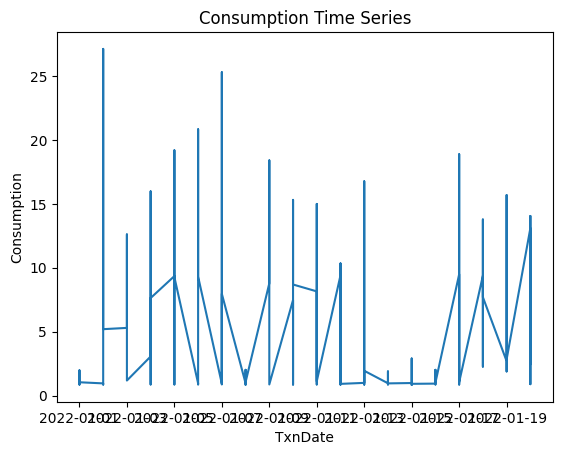

ADF Statistic: -3.8474891226902597
p-value: 0.0024571468528052135
Critical Values:
	1%: -3.435752466943879
	5%: -2.8639256700182405
	10%: -2.5680401696175466


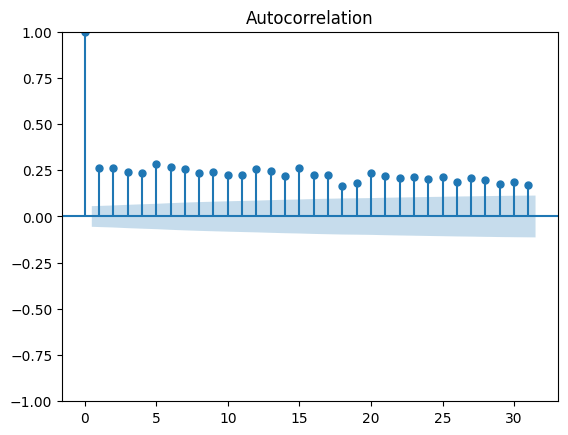

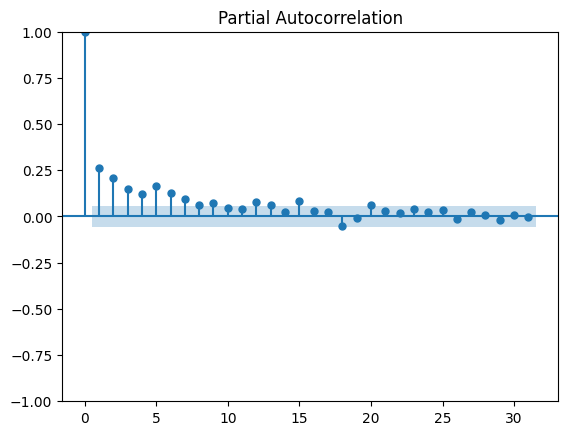

RMSE: 4.421568758477784


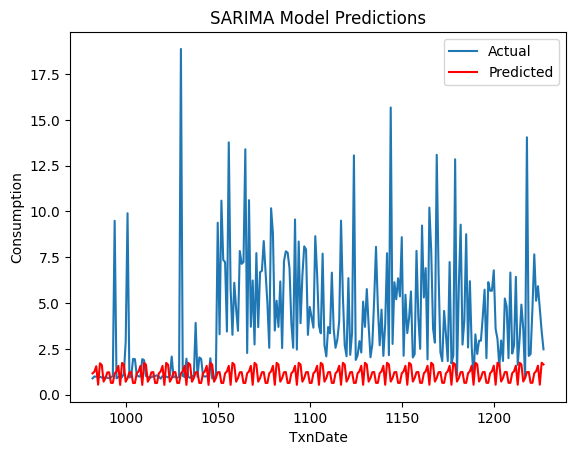

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/KwhConsumptionBlower78_1.csv')
data['TxnDate'] = pd.to_datetime(data['TxnDate'])

plt.plot(data['TxnDate'], data['Consumption'])
plt.xlabel('TxnDate')
plt.ylabel('Consumption')
plt.title('Consumption Time Series')
plt.show()

def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

check_stationarity(data['Consumption'])

plot_acf(data['Consumption'])
plt.show()
plot_pacf(data['Consumption'])
plt.show()

sarima_model = SARIMAX(data['Consumption'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

train_size = int(len(data) * 0.8)
train, test = data['Consumption'][:train_size], data['Consumption'][train_size:]

sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

predictions = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.xlabel('TxnDate')
plt.ylabel('Consumption')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.show()